<a href="https://colab.research.google.com/github/FabianaAndrade/ep_ciencia_de_dados/blob/main/treinamentos_regressao_e_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from seaborn import heatmap
import seaborn as sns
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [ ]:
caminho_arquivo = '/content/drive/MyDrive/ep_cd/data.csv'
df = pd.read_csv(caminho_arquivo, sep=';')
df = df[df['Target'] != 'Enrolled']

desconsiderando o valor "Enrolled" da variavel target para ficar apenas com os alunos graduados e os que abandonaram

In [ ]:
df = df[df['Target'] != 'Enrolled']

In [ ]:
total_dados = len(df)
print(f"Total de dados: {total_dados}")

total_amostra = int(0.1 * total_dados)
print(f"Total de amostra: {total_amostra}")

df_analise = df.sample(n=total_amostra, random_state=42)
df_restante = df.drop(df_analise.index) #Remover os dados amostrados do df original
df = df_restante


Total de dados: 3630
Total de amostra: 363


In [ ]:
df.count()

,0
Marital status,3267
Application mode,3267
Application order,3267
Course,3267
Daytime/evening attendance\t,3267
Previous qualification,3267
Previous qualification (grade),3267
Nacionality,3267
Mother's qualification,3267
Father's qualification,3267


# Pré-processamento dados

Transformando os valores da variavel target:
- Dropout = 0
- Graduated = 1

In [ ]:
df['Target'] = df['Target'].apply(lambda x: 0 if x == 'Dropout' else 1)

Hot-encoding para as variaveis categoricas
- Os valores das variaveis categoricas estão em formato numerico, por exemplo, homem = 0 e mulher 1. Para que o modelo de regressão logistica não considere os valores categoricos de forma ordinal (gere ranking) foi aplicado o one hot-encoding para as variaveis categoricas (isso aumentou a dimensionalidade da base)

In [ ]:
categoricas = [
               "Marital status",
               "Application mode",
               "Course",
               "Previous qualification",
               "Nacionality",
               "Mother's qualification",
               "Father's qualification",
               "Mother's occupation",
               "Father's occupation",
               ]

df_dummies = pd.get_dummies(df, columns=categoricas, drop_first=True)

In [ ]:
df_dummies.head()

,Application order,Daytime/evening attendance\t,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,...,Father's occupation_172,Father's occupation_174,Father's occupation_175,Father's occupation_181,Father's occupation_182,Father's occupation_183,Father's occupation_192,Father's occupation_193,Father's occupation_194,Father's occupation_195
0,5,1,122.0,127.3,1,0,0,1,1,0,...,False,False,False,False,False,False,False,False,False,False
1,1,1,160.0,142.5,1,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,False
2,5,1,122.0,124.8,1,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,False
3,2,1,122.0,119.6,1,0,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False
4,1,0,100.0,141.5,0,0,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False




#  **Regressão Logística**




Para descobrir a probabilidade um aluno se graduar foi utilizado o modelo de regressão logistica

Definição da separação X e y e conjuntos de treino e teste
que serão utilizados nos modelos

In [ ]:
X = df_dummies.drop('Target', axis=1)
y = df_dummies['Target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

Normalização do das variaveis preditivas
- Como a regressão é sensível a escala das variaveis (modelo linear)  se as variaveis tem escalas diferentes, os coefientes não sao comparaveis e o modelo pode ter um comportamento ruim.
Dessa forma, normalizamos com z-score os dados

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Treinamento do modelo

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       249
           1       0.90      0.96      0.93       405

    accuracy                           0.91       654
   macro avg       0.91      0.89      0.90       654
weighted avg       0.91      0.91      0.91       654



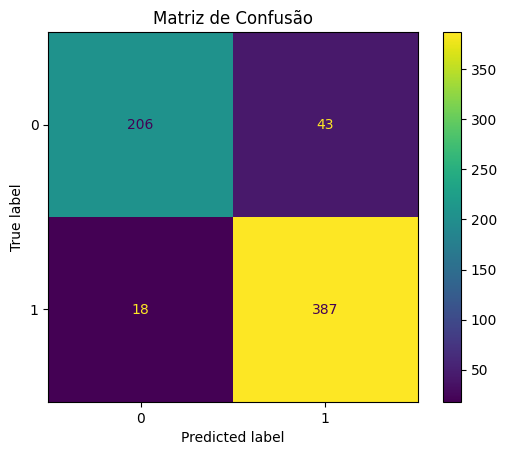

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('Matriz de Confusão')
plt.show()

Recuperando os coefientes da regressao

In [ ]:
coef = model.coef_[0]
variaveis = X_train.columns
coef_df = pd.DataFrame({'Variável': variaveis, 'Coeficiente': coef})
coef_df['Impacto'] = np.abs(coef_df['Coeficiente'])
coef_df = coef_df.sort_values(by='Impacto', ascending=False)
coef_df

,Variável,Coeficiente,Impacto
21,Curricular units 2nd sem (approved),3.312224,3.312224
15,Curricular units 1st sem (approved),1.705230,1.705230
19,Curricular units 2nd sem (enrolled),-1.640223,1.640223
7,Tuition fees up to date,0.874196,0.874196
6,Debtor,-0.446970,0.446970
...,...,...,...
141,Father's qualification_26,0.000000,0.000000
97,Nacionality_109,0.000000,0.000000
200,Father's occupation_112,0.000000,0.000000
202,Father's occupation_122,0.000000,0.000000


Os coeficientes positivos indicam que aquela variavel influencia positivamete o 1 (se graduar), ja a presença dos coefientes negativos indicam que quando aquela variavel esta presente há aumento nas chances do 0 (nao se graduar)

In [ ]:
positivas = coef_df[coef_df['Coeficiente'] > 0].sort_values(by='Impacto', ascending=False)
negativas = coef_df[coef_df['Coeficiente'] < 0].sort_values(by='Impacto', ascending=False)

print("Variáveis com impacto positivo:")
positivas

Variáveis com impacto positivo:


,Variável,Coeficiente,Impacto
21,Curricular units 2nd sem (approved),3.312224,3.312224
15,Curricular units 1st sem (approved),1.705230,1.705230
7,Tuition fees up to date,0.874196,0.874196
22,Curricular units 2nd sem (grade),0.387532,0.387532
165,Mother's occupation_9,0.288196,0.288196
...,...,...,...
128,Father's qualification_5,0.020166,0.020166
56,Course_9147,0.015912,0.015912
47,Application mode_53,0.006298,0.006298
43,Application mode_42,0.005123,0.005123


In [ ]:
print("Variáveis com impacto negativo:")
negativas

Variáveis com impacto negativo:


,Variável,Coeficiente,Impacto
19,Curricular units 2nd sem (enrolled),-1.640223,1.640223
6,Debtor,-0.446970,0.446970
12,Curricular units 1st sem (credited),-0.440229,0.440229
193,Father's occupation_9,-0.390937,0.390937
13,Curricular units 1st sem (enrolled),-0.385337,0.385337
...,...,...,...
211,Father's occupation_152,-0.009440,0.009440
146,Father's qualification_33,-0.008205,0.008205
122,Mother's qualification_42,-0.006437,0.006437
183,Mother's occupation_193,-0.004030,0.004030


Plotando os coeficientes positivos

/tmp/ipython-input-20-594651732.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df[coef_df['Coeficiente'] > 0].sort_values(by='Impacto', ascending=False)[0:10], x='Impacto', y='Variável', palette='viridis')


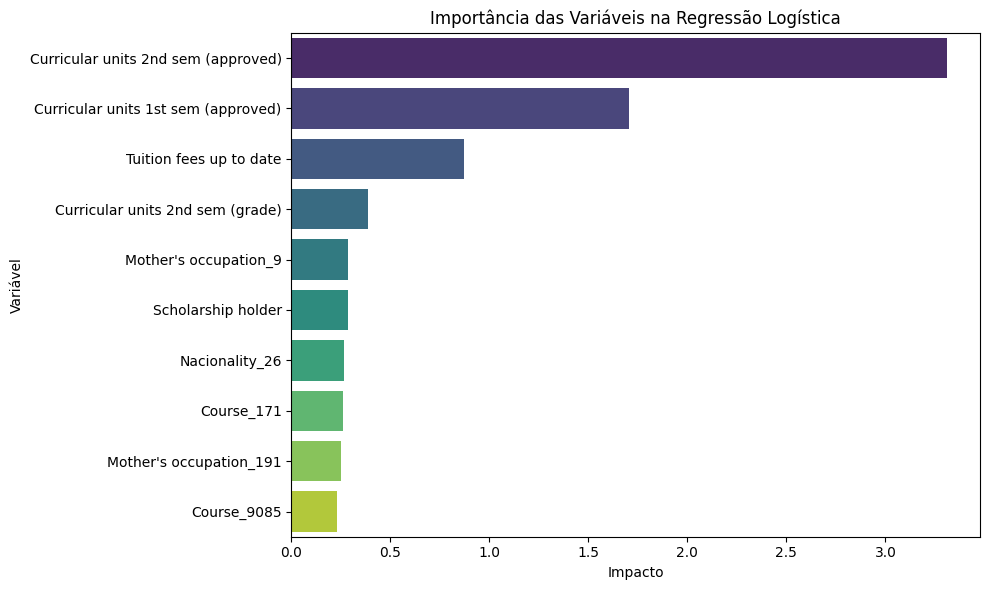

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=coef_df[coef_df['Coeficiente'] > 0].sort_values(by='Impacto', ascending=False)[0:10], x='Impacto', y='Variável', palette='viridis')
plt.title('Importância das Variáveis na Regressão Logística')
plt.tight_layout()
plt.show()


Plotando os coeficientes negativos

/tmp/ipython-input-21-3698517059.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df[coef_df['Coeficiente'] < 0].sort_values(by='Impacto', ascending=False)[0:10], x='Impacto', y='Variável', palette='viridis')


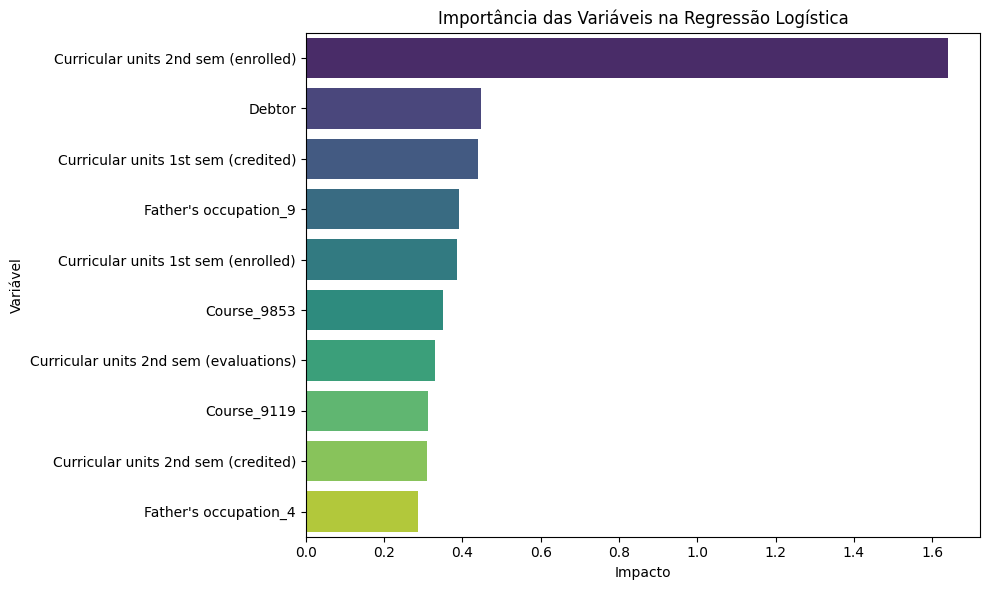

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=coef_df[coef_df['Coeficiente'] < 0].sort_values(by='Impacto', ascending=False)[0:10], x='Impacto', y='Variável', palette='viridis')
plt.title('Importância das Variáveis na Regressão Logística')
plt.tight_layout()
plt.show()


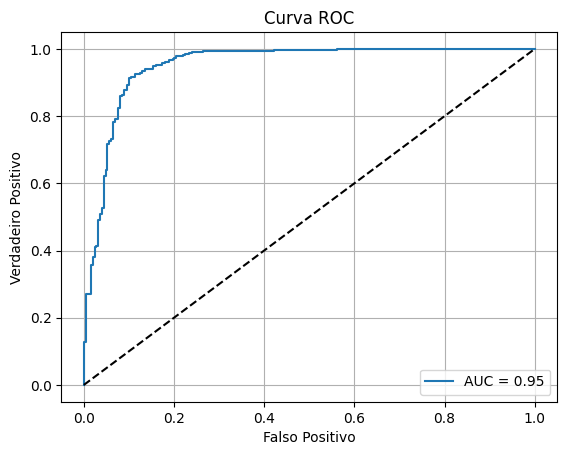

In [ ]:
y_prob = model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend()
plt.grid()
plt.show()

In [ ]:
coef = model.coef_[0]
columns = df_dummies.drop(columns=['Target']).columns

df_coef = pd.DataFrame({'Variável': columns, 'Coeficiente': coef})

df_nat = df_coef[df_coef['Variável'].str.startswith('Nacionality_')].copy()
df_nat = df_nat.sort_values(by='Coeficiente')

print(df_nat)

           Variável  Coeficiente
91   Nacionality_41    -0.157272
86   Nacionality_21    -0.094285
93  Nacionality_100    -0.086197
94  Nacionality_101    -0.067253
96  Nacionality_105    -0.045704
85   Nacionality_17     0.000000
97  Nacionality_109     0.000000
83   Nacionality_13     0.000000
92   Nacionality_62     0.036482
84   Nacionality_14     0.049596
80    Nacionality_2     0.066337
89   Nacionality_25     0.072193
95  Nacionality_103     0.082035
82   Nacionality_11     0.091335
81    Nacionality_6     0.101018
87   Nacionality_22     0.157475
88   Nacionality_24     0.173078
90   Nacionality_26     0.263653


# **K-MEANS E PCA**

Para  descobrir possiveis grupos mais propensos a abandonar a graduação e idenficação de caracteristicas comuns, foi aplicado o algoritmo de k-means. E para reduzir a dimensionalidade das variaveis foi aplicada a tecnica de PCA

Normalizando as variaveis preditivas

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_dummies.drop(columns=['Target']))

**Descobrindo o numero de componentes ideal**

Por conta da aplicação do one-hot-encoding nas variaveis categorias, o total de colunas do dataset passou de 37 para mais de 150, dessa forma foi aplicado o conceito de PCA para capturar as variaveis mais importantes apenas, ou seja, aquelas que ajudam a explicar a variabilidade dos dados com mais força.

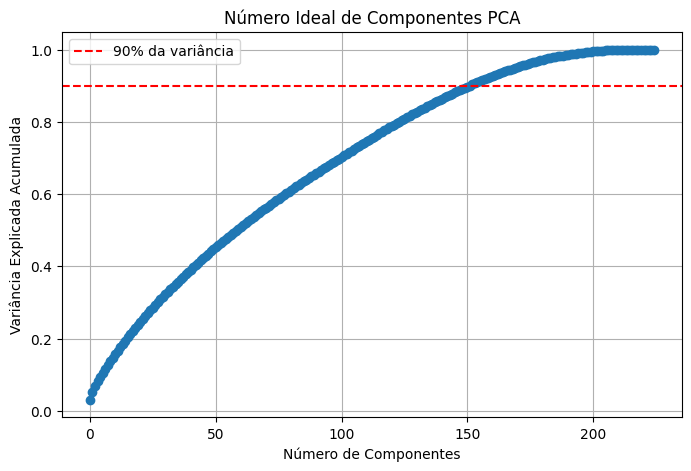

In [ ]:
pca = PCA(n_components=None)
X_pca_full = pca.fit_transform(X_scaled)

variancia_acumulada = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(variancia_acumulada, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Número Ideal de Componentes PCA')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% da variância')
plt.legend()
plt.grid(True)
plt.show()

a partir de 150 variaveis já se explica mais de 90% da variabilidade dos dados

In [ ]:
pca = PCA(n_components=160)
X_pca = pca.fit_transform(X_scaled)

**Descobrindo o numero ideal de clusters**

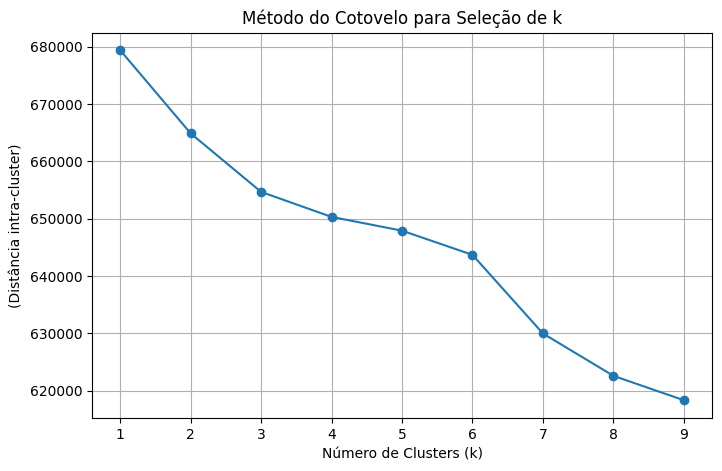

In [ ]:
inertias = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("(Distância intra-cluster)")
plt.title("Método do Cotovelo para Seleção de k")
plt.grid(True)
plt.show()

Aplicando a tecnica do cotovelo para definir o numero ideal de clusters, é possivel perceber que a partir de 3 cluster a diferença intra-cluster é pouca, assim sendo o n_clusters escolhido foi 3

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca)

ANALISANDO 2 COMPONENTES PRINCIPAIS

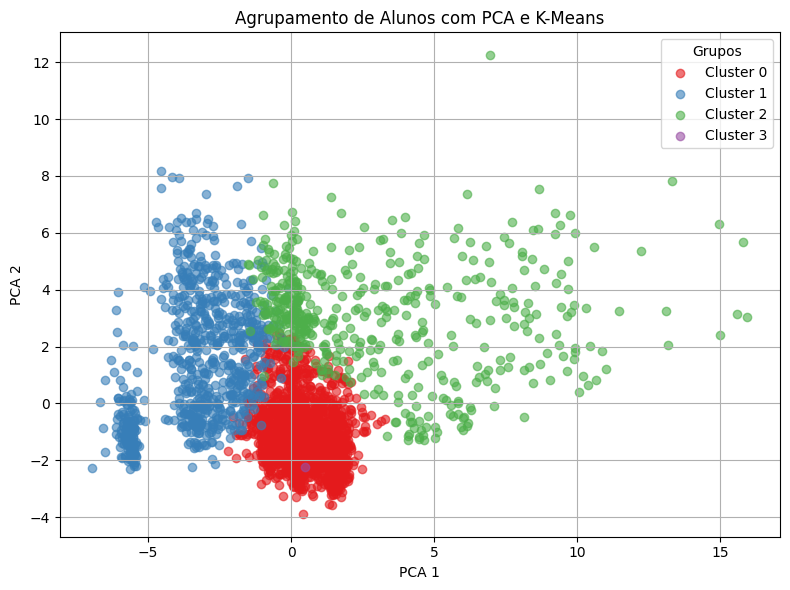

In [ ]:
plt.figure(figsize=(8, 6))

colors = plt.cm.Set1(np.arange(4))

for i in range(4):
    plt.scatter(
        X_pca[clusters == i, 0],  #PCA componente 1
        X_pca[clusters == i, 1],  #PCA componente 2
        color=colors[i],
        label=f'Cluster {i}',
        alpha=0.6
    )

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Agrupamento de Alunos com PCA e K-Means")
plt.legend(title="Grupos")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([0.03047218, 0.02277393, 0.01505894, 0.01315982, 0.01239104,
       0.01144313, 0.01083958, 0.0107219 , 0.01024508, 0.01011507,
       0.00998067, 0.00960663, 0.00927624, 0.00913669, 0.00909751,
       0.00888017, 0.00874072, 0.00859619, 0.00851479, 0.00843813,
       0.00829335, 0.00823318, 0.00799845, 0.00797142, 0.00782055,
       0.0077261 , 0.00761005, 0.00756271, 0.00741853, 0.00728766,
       0.00716077, 0.00710913, 0.00708197, 0.00702088, 0.00691583,
       0.00685704, 0.00682296, 0.00675341, 0.00670296, 0.00667234,
       0.00657685, 0.00649424, 0.0064628 , 0.00633759, 0.00631027,
       0.00628344, 0.00621909, 0.00618493, 0.00608367, 0.00604797,
       0.00596009, 0.00591155, 0.00580521, 0.00575247, 0.00573194,
       0.00567254, 0.00564304, 0.00558987, 0.00554508, 0.00547576,
       0.00543971, 0.00542308, 0.00538204, 0.00535624, 0.00532231,
       0.00527486, 0.00522228, 0.00520494, 0.0051809 , 0.00513713,
       0.00508446, 0.00507113, 0.00502858, 0.00499664, 0.00496

In [ ]:
pca.singular_values_

array([149.66409266, 129.38525662, 105.21145042,  98.35371157,
        95.4376471 ,  91.71455988,  89.26312839,  88.77724308,
        86.78076611,  86.2283823 ,  85.65361557,  84.03329798,
        82.57560193,  81.95212094,  81.77622463,  80.79349969,
        80.15660926,  79.49114754,  79.11388927,  78.75694891,
        78.07837649,  77.79464576,  76.67766122,  76.54798666,
        75.82014156,  75.36088679,  74.7927473 ,  74.55975143,
        73.84564314,  73.19136865,  72.55138774,  72.28928648,
        72.15106757,  71.83919609,  71.29973794,  70.99606893,
        70.81940561,  70.45753801,  70.19387232,  70.03334442,
        69.53042006,  69.09238101,  68.92489848,  68.25394674,
        68.10671657,  67.96172656,  67.61282861,  67.42689282,
        66.87269259,  66.67616814,  66.18997056,  65.91988229,
        65.32429961,  65.02691658,  64.91073865,  64.57354805,
        64.40544071,  64.10130443,  63.84392721,  63.44365585,
        63.23442485,  63.13770093,  62.89836498,  62.74

Cluster 0: tem o maior percentual de não concluintes

In [ ]:
df_cluster = pd.DataFrame({'Cluster': clusters, 'Target': df_dummies['Target']})
df_cluster.groupby('Cluster')['Target'].value_counts(normalize=True).round(2)

Cluster  Target
0        1         0.78
         0         0.22
1        0         0.90
         1         0.10
2        1         0.67
         0         0.33
3        1         1.00
Name: proportion, dtype: float64

In [ ]:
df_c_analise = df_dummies.copy()
df_c_analise['Cluster'] = clusters

cluster_profile = df_c_analise.groupby('Cluster').mean(numeric_only=True).round(2)

cluster_profile.transpose()

Cluster,0,1,2,3
Application order,1.98,1.55,1.11,2.0
Daytime/evening attendance\t,0.99,0.84,0.54,1.0
Previous qualification (grade),133.36,132.34,131.75,136.0
Admission grade,127.15,125.98,129.70,135.7
Displaced,0.66,0.45,0.24,1.0
...,...,...,...,...
Father's occupation_183,0.00,0.00,0.00,0.0
Father's occupation_192,0.00,0.00,0.01,0.0
Father's occupation_193,0.00,0.00,0.00,0.0
Father's occupation_194,0.00,0.00,0.00,0.0


In [ ]:
componentes_df = pd.DataFrame(
    pca.components_,
    columns=df_c_analise.drop(columns=['Target', 'Cluster']).columns,
    index=[f'PCA {i+1}' for i in range(pca.n_components_)]
)
componentes_df.loc['PCA 1'].sort_values(key=abs, ascending=False).head(10)

,PCA 1
Curricular units 1st sem (approved),0.349788
Curricular units 1st sem (enrolled),0.340521
Curricular units 2nd sem (enrolled),0.333350
Curricular units 2nd sem (approved),0.330040
Curricular units 1st sem (evaluations),0.283573
Curricular units 2nd sem (evaluations),0.280936
Curricular units 1st sem (credited),0.270225
Curricular units 2nd sem (credited),0.268297
Curricular units 2nd sem (grade),0.254941
Curricular units 1st sem (grade),0.253492


In [ ]:
componentes_df.loc['PCA 2'].sort_values(key=abs, ascending=False).head(10)

,PCA 2
Age at enrollment,0.365533
Application mode_39,0.275952
Daytime/evening attendance\t,-0.267794
Marital status_2,0.231935
Displaced,-0.211791
Mother's qualification_37,0.194670
Course_9991,0.186901
Course_8014,0.180551
Application order,-0.170090
Curricular units 1st sem (credited),0.151190
